# DIGIT PREPROCESSING

## Imports

In [1]:
from PIL                import Image, ImageFilter
from IPython.display    import Image as show
import numpy as np
from IPython.display    import display

## Functions

In [2]:
def preview(img, title = ''):
    pix_path = '/tmp/pix_output.png'
    img.save(pix_path)
    pic = show(filename=pix_path)
    if title != '': print title
    display(pic)

In [3]:
def black_and_white(img, threshold = 128):
    gray = img.convert('L')        # convert the RGB image to grayscale image
    bw = np.asarray(gray).copy()   # read the grayscale image into an array

    bw[bw < threshold]  = 0        # Black
    bw[bw >= threshold] = 255      # White

    img = Image.fromarray(bw)
    return img

In [4]:
def resize(img, x, y, antialias = None):
    img.thumbnail((x, y), antialias) if antialias else img.thumbnail((x, y))
    return img

In [5]:
def gaussian_blur(img, radius):
    img = img.filter(ImageFilter.GaussianBlur(radius))
    return img

In [6]:
def sharpen(img):
    img.filter(ImageFilter.SHARPEN)
    return img

In [7]:
def print_ascii(img):
    arr = np.asarray(img).copy()
    for row in arr:
        line = ''
        for cell in row:
            result = 0
            if cell == 0:
                result = 1
            line = line + str(result)
        print line

In [45]:
def add_frame(img, border_width = 0, pad_with = 255):
    arr = np.asarray(img).copy()
    new_array = np.pad(arr, 4, mode='constant', constant_values=pad_with)
    
    img = Image.fromarray(new_array)
    return img

## Digit image paths

In [8]:
DIGITS_FOLDER = '/home/farmer/raspifarm/resources/images/digits'

digitPathFor = {
    "0": DIGITS_FOLDER + '/digit_0_64x64.jpg',
    "1": DIGITS_FOLDER + '/digit_1_64x64.jpg',
    "2": DIGITS_FOLDER + '/digit_2_64x64.jpg',
    "3": DIGITS_FOLDER + '/digit_3_64x64.jpg',
    "4": DIGITS_FOLDER + '/digit_4_64x64.jpg',
    "5": DIGITS_FOLDER + '/digit_5_64x64.jpg',
    "6": DIGITS_FOLDER + '/digit_6_64x64.jpg',
    "7": DIGITS_FOLDER + '/digit_7_64x64.jpg',
    "8": DIGITS_FOLDER + '/digit_8_64x64.jpg',
    "9": DIGITS_FOLDER + '/digit_9_64x64.jpg'
}

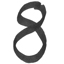

In [9]:
# Example, show a digit
show(digitPathFor['8'])

## Preprocess a digit

original


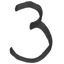

b/w on original


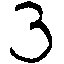

blurred


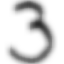

sharpened


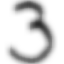

bw on blurred/sharpened


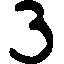

resized


bw on blurred/sharpened/resized


with white frame of 4


ASCII (28x28)
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000011110000000000000
0000000001111111100000000000
0000000001111111100000000000
0000000000000001110000000000
0000000000000000100000000000
0000000000000001100000000000
0000000000000011110000000000
0000000000000111111000000000
0000000000000111111000000000
0000000000000000111100000000
0000000000000000011100000000
0000000000000000001100000000
0000000000000000001100000000
0000000000000000000100000000
0000000000000000001100000000
0000000110000000001100000000
0000000111000000011100000000
0000000111110001111000000000
0000000001111111110000000000
0000000000011111000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000


In [49]:
input_digit             = digitPathFor['3']
BW_OUTPUT_PATH          = '/tmp/bw_digit.png'
RESIZED_OUTPUT_PATH     = '/tmp/bw_resized_digit.png'

# Open the digit file and print it
digit = Image.open(input_digit)

preview(digit, 'original')

digit = black_and_white(digit, 144)
preview(digit, 'b/w on original')

digit = gaussian_blur(digit, 6)
preview(digit, 'blurred')

digit = sharpen(digit)
preview(digit, 'sharpened')

digit = black_and_white(digit, 192)
preview(digit, 'bw on blurred/sharpened')

digit = resize(digit, 20, 20)
preview(digit, 'resized')

digit = black_and_white(digit, 96)
preview(digit, 'bw on blurred/sharpened/resized')

digit = add_frame(digit)
preview(digit, 'with white frame of 4')

print 'ASCII (28x28)'
print_ascii(digit)

